In [ ]:
# import required libraries
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn as nn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

GET DATASET

In [ ]:
# get dataset
 
bc = datasets.load_breast_cancer()

X, y = bc.data, bc.target

n_samples, n_features = X.shape

input_dim = n_features

print(n_samples, n_features)


569 30


In [ ]:
y[-10:-1]

array([1, 1, 1, 0, 0, 0, 0, 0, 0])

PREPARE DATASET

In [ ]:
# split dataset into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle =True, random_state = 42)

# initiate the Standard Scalar
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# transform the features and target into torch variables
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshape the target to 1D vector
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

CREATE MODEL

In [ ]:
# For classification, sigmoid function is used 
# y = wx + b, sigmoid for probability = 1/(1+e-y)

class LogisticRegression(nn.Module):

  def __init__(self, input_features_dim):

    super(LogisticRegression, self).__init__()

    self.linear = nn.Linear(input_features_dim, 1) # 1 because we only want one label out

  def forward(self, x):
    y_preds = torch.sigmoid(self.linear(x))

    return y_preds


TRAINING

In [ ]:
# instantiate the model
model = LogisticRegression(n_features)

# loss 
criterion = nn.BCELoss()

# optimizer
lr = 0.01
optim = torch.optim.SGD(model.parameters(), lr = lr)

num_epochs = 100

# training loop
total_acc,  total_count = 0, 0
for epoch in range(num_epochs):
  # forward pass
  outputs = model(X_train)

  # compute loss
  loss = criterion(outputs, y_train)

  # backward pass
  loss.backward()

  _, predicted = torch.max(outputs.data, 1)
  
  # update weights
  optim.step()

  # zero grad
  optim.zero_grad()


  if (epoch+1) % 10 == 0:
    print(f'epoch - {epoch + 1}, loss : {loss.item():.4f}')


epoch - 10, loss : 0.5071
epoch - 20, loss : 0.4357
epoch - 30, loss : 0.3874
epoch - 40, loss : 0.3524
epoch - 50, loss : 0.3256
epoch - 60, loss : 0.3045
epoch - 70, loss : 0.2873
epoch - 80, loss : 0.2729
epoch - 90, loss : 0.2607
epoch - 100, loss : 0.2502


EVALUATION AND PREDICTION

In [ ]:
def accuracy(preds, target):
  preds = preds.round()
  acc = preds.eq(target).sum()/ target.numel()
  return acc.items()

In [ ]:
# since we don't want to track our grad history,
# we use torch.no grad with context manager
with torch.no_grad():
  y_preds = model(X_test)
  acc = accuracy(y_preds, y_test)
  print(acc)

0.9649122953414917


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
preds = y_preds.round()
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        43
         1.0       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
print(confusion_matrix(y_test, preds))

[[41  2]
 [ 2 69]]


In [ ]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
print(bc.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


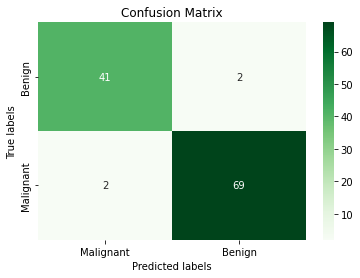

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     
cm = confusion_matrix(y_test, preds)
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Malignant', 'Benign']); 
ax.yaxis.set_ticklabels(['Benign', 'Malignant']);